# TAXI DATA ANALYSIS AND TRIP DURATION PREDICTION
IN THIS NOTEBOOK I HAVE USED DATA OF YELLOW TAXI TRIP RECORD OF 2016 JANUARY COLLECTED BY *TLC Trip Record Data* .These are collected and provided to the NYC Taxi(TLC) by technology providers authorized under the Taxicab & Livery Passenger Enhancement Programs.
> **Data set provider** : [nyc.gov](https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page).

>Data type : parquet
## [Data Dictionary for yellow taxi trip records](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)
- **VendorID** :  A code indicating the provider that provided the record. 1= Creative Mobile Technologies,LLC. 2= VeriFone Inc.
  
- **tpep_pickup_datetime** : The date and time when the meter was started recording the trip.
  
- **tpep_dropoff_datetime** : The date and time when the meter was ended recording the trip.
  
- **passenger_count** : The number of passengers in the vehicle reported by the taxi drivers.
  
- **trip_distance** : The elapsed trip distance in miles reported by the taximeter in miles.
  
- **RatecodeID** : The final rate code in effect at the end of the trip. 1= Standard rate,2=JFK,3=Newark,4=Nassau or Westchester, 5=Negotiated fare, 6=Group ride.
  
- **store_and_fwd_flag** : Provideds a flag that is it stored in the taxi memmory before sending the proivded due to any issues.Y= stored in the system then send to provider. N = not stored in the taxi memmory
  
- **PULocationID** : Pickup location id.There is 256 locations and the dictionary for these locations are available on the mentioned web site.
  
- **DOLocationID** : Dropoff location id.There is 256 locations and the dictionary for these locations are available on the mentioned web site.
  
- **payment_type** : A numeric values which representing the payment method.1= Credit card, 2= Cash, 3= No charge, 4=Dispute, 5= Unknown, 6= Voided trip.
  
- **fare_amount** : The time and distance fare calculated by the meter.
  
- **extra** : Miscellaneous extras and surcharges. Currently, this only includes the 0.5 and $1 rush hour and overnight charges. 

- **mta_tax** : a $0.50 automatically added based on the metered rate
  
- **tip_amount** : Automatically added when a credit card payment occured.
  
- **tolls_amount** : Total amount of tolls paid during the trip.
  
- **improvement_surcharge** : A $0.30 assesed trips at the flag drop.
  
- **total_amount** : Total amount charged to the passenger.
  
- **congestion_surcharge** : Total amount that is collected in trip for NYS congestion surcharge.
  
- **airport_fee** : $1.25 pickup charge only at LaGuardia and John F.Kennedy Airports.

# Table of contents
**Research question**
- Import libraries.
- Read data files.
- Data Exploration and dealing with duplicate and null values
- Feature Transformation and Extraction
  
**Univariate Analysis**

*Analysing each features individually*
- Vendors
- Passengers on ride
- Distance of the ride
- Ratecode id
- Store and forward flag
- Payment type
- Total amount
- Trip duration
- Trips per hour
- Trips per weekday

**Bivariate Analysis**

*Analyising two defferent freatures and ploting insights*
- Trip duration per hour,weekday
- Trip Distance vs Trip duration

**Feature selection**

**Correlation Analysis**

**ML Model**

**Validation of the Model**

# Research question
***
**Analyising the nyc trip dataset to develop a mechine learing model to predict trip duration**

# Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import pyarrow.parquet as pq
import matplotlib.pyplot as plt

from matplotlib.ticker import ScalarFormatter #for x axis scalar formation
from sklearn.model_selection import train_test_split #for spliting data for model
from sklearn.linear_model import LinearRegression # for linear regression
from sklearn import metrics # for evaluating the model
from sklearn.ensemble import RandomForestRegressor #for Random forest 
from xgboost import XGBRegressor # for xgboost model

from sklearn.metrics import mean_squared_error, mean_squared_log_error, r2_score # for model evaluation


# Read data file

In [2]:

file_path = ['../data/yellow_tripdata_2016-01.parquet']

dfs = []


for file_path in file_path:
    table = pq.read_table(file_path)
    df = table.to_pandas()
    dfs.append(df)


data_jan = pd.concat(dfs, ignore_index=True)


print(data_jan)


          VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
0                1  2016-01-01 00:12:22   2016-01-01 00:29:14   
1                1  2016-01-01 00:41:31   2016-01-01 00:55:10   
2                1  2016-01-01 00:53:37   2016-01-01 00:59:57   
3                1  2016-01-01 00:13:28   2016-01-01 00:18:07   
4                1  2016-01-01 00:33:04   2016-01-01 00:47:14   
...            ...                  ...                   ...   
10905062         1  2016-01-31 23:42:59   2016-01-31 23:51:01   
10905063         1  2016-01-31 23:13:07   2016-01-31 23:27:20   
10905064         2  2016-01-31 23:39:18   2016-01-31 23:54:14   
10905065         2  2016-01-31 23:03:58   2016-01-31 23:07:26   
10905066         2  2016-01-31 23:10:54   2016-01-31 23:15:58   

          passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0                       1           3.20           1                  N   
1                       2           1.00           1                 

In [3]:
data_jan.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2016-01-01 00:12:22,2016-01-01 00:29:14,1,3.2,1,N,48,262,1,14.0,0.5,0.5,3.06,0.0,0.3,18.36,None,None
1,1,2016-01-01 00:41:31,2016-01-01 00:55:10,2,1.0,1,N,162,48,2,9.5,0.5,0.5,0.00,0.0,0.3,10.80,None,None
2,1,2016-01-01 00:53:37,2016-01-01 00:59:57,1,0.9,1,N,246,90,2,6.0,0.5,0.5,0.00,0.0,0.3,7.30,None,None
3,1,2016-01-01 00:13:28,2016-01-01 00:18:07,1,0.8,1,N,170,162,2,5.0,0.5,0.5,0.00,0.0,0.3,6.30,None,None
4,1,2016-01-01 00:33:04,2016-01-01 00:47:14,1,1.8,1,N,161,140,2,11.0,0.5,0.5,0.00,0.0,0.3,12.30,None,None


In [4]:
data_jan.shape

(10905067, 19)

In [5]:
data_jan.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,1.090507e+07,10905067,10905067,1.090507e+07,1.090507e+07,1.090507e+07,1.090507e+07,1.090507e+07,1.090507e+07,1.090507e+07,1.090507e+07,1.090507e+07,1.090507e+07,1.090507e+07,1.090507e+07,1.090507e+07
mean,1.535005e+00,2016-01-16 13:45:41.820948480,2016-01-16 14:00:57.898051584,1.670912e+00,4.497236e+00,1.039289e+00,1.631341e+02,1.607890e+02,1.347478e+00,1.248720e+01,3.131052e-01,4.976896e-01,1.750894e+00,2.933613e-01,2.997352e-01,1.564197e+01
min,1.000000e+00,2016-01-01 00:00:00,2016-01-01 00:00:00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-9.576000e+02,-4.261000e+01,-5.000000e-01,-2.208000e+02,-1.740000e+01,-3.000000e-01,-9.584000e+02
25%,1.000000e+00,2016-01-09 00:03:34,2016-01-09 00:17:51,1.000000e+00,1.000000e+00,1.000000e+00,1.140000e+02,1.070000e+02,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,8.300000e+00
50%,2.000000e+00,2016-01-16 03:54:24,2016-01-16 04:10:38,1.000000e+00,1.680000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,9.000000e+00,0.000000e+00,5.000000e-01,1.260000e+00,0.000000e+00,3.000000e-01,1.162000e+01
75%,2.000000e+00,2016-01-23 13:08:56.500000,2016-01-23 13:31:23,2.000000e+00,3.080000e+00,1.000000e+00,2.330000e+02,2.330000e+02,2.000000e+00,1.400000e+01,5.000000e-01,5.000000e-01,2.320000e+00,0.000000e+00,3.000000e-01,1.716000e+01
max,2.000000e+00,2016-01-31 23:59:59,2016-03-28 12:54:26,9.000000e+00,8.000010e+06,9.900000e+01,2.650000e+02,2.650000e+02,5.000000e+00,1.112709e+05,6.488700e+02,8.970000e+01,9.981400e+02,9.801500e+02,3.000000e-01,1.112716e+05
std,4.987731e-01,NaN,NaN,1.324953e+00,2.938997e+03,5.135201e-01,6.664417e+01,7.071920e+01,4.910573e-01,3.552996e+01,4.156882e-01,5.036344e-02,2.623646e+00,1.694584e+00,1.218746e-02,3.637961e+01


# Data Exploration

### Handling duplicate rows and missing values

In [6]:
data_jan = data_jan.drop_duplicates()
data_jan.shape

(10905065, 19)

In [7]:
data_jan.isnull().sum()

VendorID                        0
tpep_pickup_datetime            0
tpep_dropoff_datetime           0
passenger_count                 0
trip_distance                   0
RatecodeID                      0
store_and_fwd_flag              0
PULocationID                    0
DOLocationID                    0
payment_type                    0
fare_amount                     0
extra                           0
mta_tax                         0
tip_amount                      0
tolls_amount                    0
improvement_surcharge           0
total_amount                    0
congestion_surcharge     10905065
airport_fee              10905065
dtype: int64

#### Observations:

- There is no any data available for congestion_surcharge and airport_fee
- There is no null values in any of the other features

#### Action:

- Drop both Congestion_surcharge and airport_fee features


In [8]:
#droping both columns from the data set
data_jan = data_jan.drop(columns=["congestion_surcharge","airport_fee"])
data_jan

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2016-01-01 00:12:22,2016-01-01 00:29:14,1,3.20,1,N,48,262,1,14.0,0.5,0.5,3.06,0.0,0.3,18.36
1,1,2016-01-01 00:41:31,2016-01-01 00:55:10,2,1.00,1,N,162,48,2,9.5,0.5,0.5,0.00,0.0,0.3,10.80
2,1,2016-01-01 00:53:37,2016-01-01 00:59:57,1,0.90,1,N,246,90,2,6.0,0.5,0.5,0.00,0.0,0.3,7.30
3,1,2016-01-01 00:13:28,2016-01-01 00:18:07,1,0.80,1,N,170,162,2,5.0,0.5,0.5,0.00,0.0,0.3,6.30
4,1,2016-01-01 00:33:04,2016-01-01 00:47:14,1,1.80,1,N,161,140,2,11.0,0.5,0.5,0.00,0.0,0.3,12.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905062,1,2016-01-31 23:42:59,2016-01-31 23:51:01,1,1.50,1,N,41,42,1,7.5,0.5,0.5,2.20,0.0,0.3,11.00
10905063,1,2016-01-31 23:13:07,2016-01-31 23:27:20,1,2.60,1,N,140,239,1,12.0,0.5,0.5,3.30,0.0,0.3,16.60
10905064,2,2016-01-31 23:39:18,2016-01-31 23:54:14,5,5.63,1,N,74,212,2,18.5,0.5,0.5,0.00,0.0,0.3,19.80
10905065,2,2016-01-31 23:03:58,2016-01-31 23:07:26,2,0.77,1,N,79,107,2,5.0,0.5,0.5,0.00,0.0,0.3,6.30


### Feature transformation
***
- Transforming pickup and dropoff features to datetime formate for feature extration

In [9]:
#here i have used pd.to_datetime funcrion for transformation
data_jan['tpep_pickup_datetime'] = pd.to_datetime(data_jan['tpep_pickup_datetime'])
data_jan['tpep_dropoff_datetime'] = pd.to_datetime(data_jan['tpep_dropoff_datetime'])
data_jan

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2016-01-01 00:12:22,2016-01-01 00:29:14,1,3.20,1,N,48,262,1,14.0,0.5,0.5,3.06,0.0,0.3,18.36
1,1,2016-01-01 00:41:31,2016-01-01 00:55:10,2,1.00,1,N,162,48,2,9.5,0.5,0.5,0.00,0.0,0.3,10.80
2,1,2016-01-01 00:53:37,2016-01-01 00:59:57,1,0.90,1,N,246,90,2,6.0,0.5,0.5,0.00,0.0,0.3,7.30
3,1,2016-01-01 00:13:28,2016-01-01 00:18:07,1,0.80,1,N,170,162,2,5.0,0.5,0.5,0.00,0.0,0.3,6.30
4,1,2016-01-01 00:33:04,2016-01-01 00:47:14,1,1.80,1,N,161,140,2,11.0,0.5,0.5,0.00,0.0,0.3,12.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905062,1,2016-01-31 23:42:59,2016-01-31 23:51:01,1,1.50,1,N,41,42,1,7.5,0.5,0.5,2.20,0.0,0.3,11.00
10905063,1,2016-01-31 23:13:07,2016-01-31 23:27:20,1,2.60,1,N,140,239,1,12.0,0.5,0.5,3.30,0.0,0.3,16.60
10905064,2,2016-01-31 23:39:18,2016-01-31 23:54:14,5,5.63,1,N,74,212,2,18.5,0.5,0.5,0.00,0.0,0.3,19.80
10905065,2,2016-01-31 23:03:58,2016-01-31 23:07:26,2,0.77,1,N,79,107,2,5.0,0.5,0.5,0.00,0.0,0.3,6.30


In [10]:
#converting trip distance miles to km
miles_to_km_factot = 1.60934

# Convert miles to kilometers
data_jan["trip_distance"] = (data_jan["trip_distance"] * miles_to_km_factot).round(2)

### Feature Extraction
***
- Extracting pickup hour, weekday, month, day name from the pickup datetime feature
- Creating New features for trip duration and average speed of the trip from pickup and dropoff time

In [11]:
#creating new features for pickup hour and day of week and weekname from the pickup datetime

data_jan['pickup_hour'] = data_jan['tpep_pickup_datetime'].dt.hour
data_jan['weekday'] = data_jan['tpep_pickup_datetime'].dt.weekday
data_jan['month'] = data_jan['tpep_pickup_datetime'].dt.month
data_jan['pickup_day_name'] = data_jan['tpep_pickup_datetime'].dt.strftime('%A')



In [12]:
#creating new feature for trip duratioin in secound

data_jan['trip_duration_sec'] = (data_jan['tpep_dropoff_datetime'] - data_jan['tpep_pickup_datetime']).dt.total_seconds()

#creating feature for average speed miles/hour
data_jan['avg_speed_kph'] = abs( data_jan['trip_distance'] / data_jan['trip_duration_sec'] *3600 ).round(2)

In [13]:
data_jan["avg_speed_kph"].describe()

count    10894049.00
mean             inf
std              NaN
min             0.00
25%            12.74
50%            17.09
75%            23.21
max              inf
Name: avg_speed_kph, dtype: float64

In [14]:
data_jan

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,pickup_hour,weekday,month,pickup_day_name,trip_duration_sec,avg_speed_kph
0,1,2016-01-01 00:12:22,2016-01-01 00:29:14,1,5.15,1,N,48,262,1,...,3.06,0.0,0.3,18.36,0,4,1,Friday,1012.0,18.32
1,1,2016-01-01 00:41:31,2016-01-01 00:55:10,2,1.61,1,N,162,48,2,...,0.00,0.0,0.3,10.80,0,4,1,Friday,819.0,7.08
2,1,2016-01-01 00:53:37,2016-01-01 00:59:57,1,1.45,1,N,246,90,2,...,0.00,0.0,0.3,7.30,0,4,1,Friday,380.0,13.74
3,1,2016-01-01 00:13:28,2016-01-01 00:18:07,1,1.29,1,N,170,162,2,...,0.00,0.0,0.3,6.30,0,4,1,Friday,279.0,16.65
4,1,2016-01-01 00:33:04,2016-01-01 00:47:14,1,2.90,1,N,161,140,2,...,0.00,0.0,0.3,12.30,0,4,1,Friday,850.0,12.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905062,1,2016-01-31 23:42:59,2016-01-31 23:51:01,1,2.41,1,N,41,42,1,...,2.20,0.0,0.3,11.00,23,6,1,Sunday,482.0,18.00
10905063,1,2016-01-31 23:13:07,2016-01-31 23:27:20,1,4.18,1,N,140,239,1,...,3.30,0.0,0.3,16.60,23,6,1,Sunday,853.0,17.64
10905064,2,2016-01-31 23:39:18,2016-01-31 23:54:14,5,9.06,1,N,74,212,2,...,0.00,0.0,0.3,19.80,23,6,1,Sunday,896.0,36.40
10905065,2,2016-01-31 23:03:58,2016-01-31 23:07:26,2,1.24,1,N,79,107,2,...,0.00,0.0,0.3,6.30,23,6,1,Sunday,208.0,21.46


In [15]:
data_jan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10905065 entries, 0 to 10905066
Data columns (total 23 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        int64         
 4   trip_distance          float64       
 5   RatecodeID             int64         
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  pickup_hour            int32         
 18  weekday                in

# Univariate analysis
***
- *Analysing each features individually and removing outliers*
- Vendors
- Passengers on ride
- Distance of the ride
- Ratecode id
- Store and forward flag
- Payment type
- Total amount
- Trip duration
- Trips per hour
- Trips per weekday

### Vendors
***
Here in this data set there is vendor 1 and 2 we are going to analyse these variables

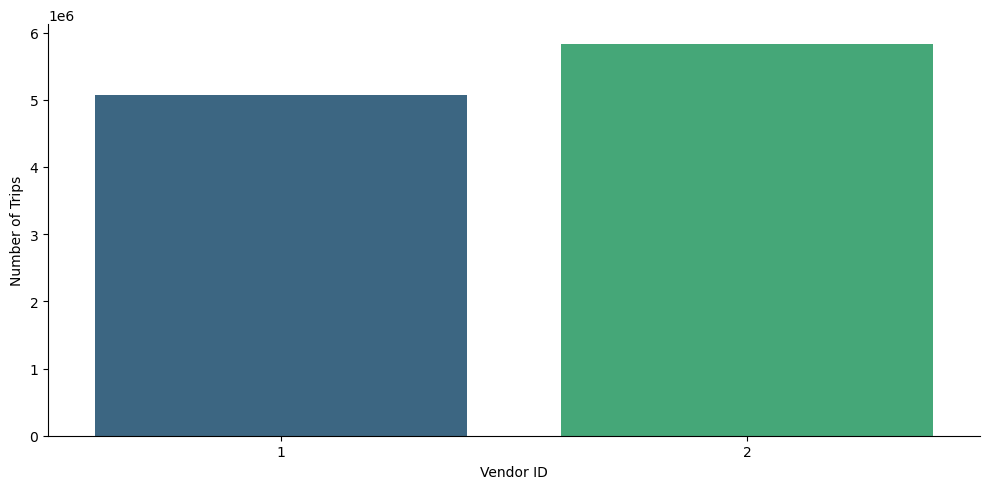

In [16]:
p2 = sns.catplot(x='VendorID', kind='count', data=data_jan, palette='viridis', height=5, aspect=2)
p2.set_axis_labels("Vendor ID", "Number of Trips")
p2.set_titles("Distribution of Vendor ID")

- As per the graph vendor 2,VeriFone Inc is more popular

### Passenger Count
***
In nyc city max passenger allowed is 5 adult + 1 minor

In [17]:
data_jan["passenger_count"].value_counts()

passenger_count
1    7725504
2    1561734
5     601038
3     436414
6     369147
4     210638
0        519
8         26
9         23
7         22
Name: count, dtype: int64

In [18]:
data_jan["passenger_count"].describe()

count    1.090506e+07
mean     1.670912e+00
std      1.324953e+00
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      9.000000e+00
Name: passenger_count, dtype: float64

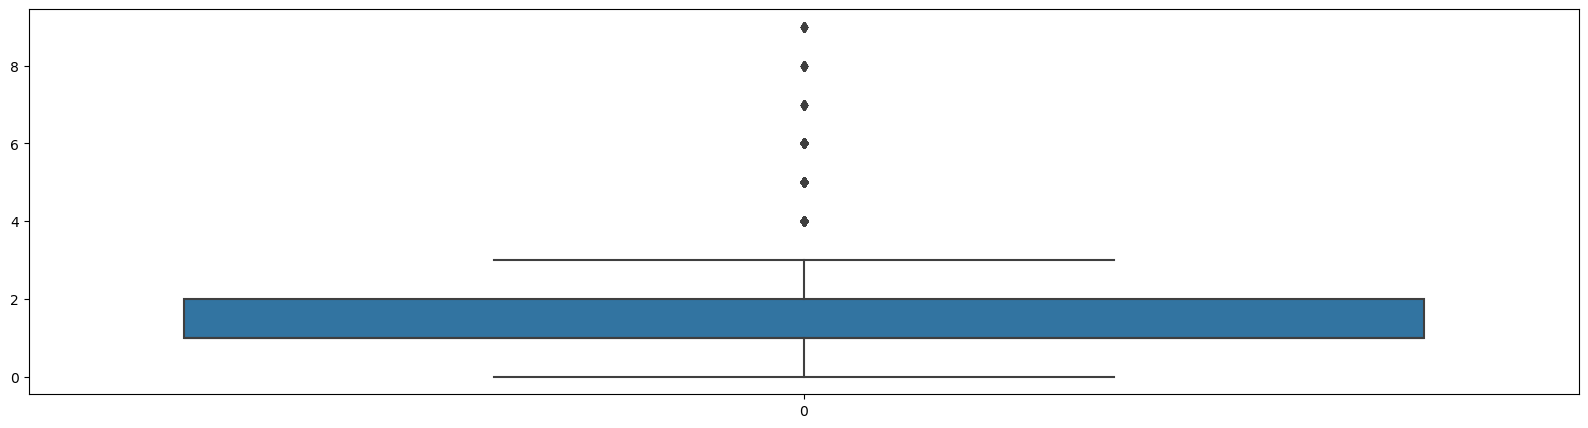

In [19]:
plt.figure(figsize = (20,5))
sns.boxplot(data_jan["passenger_count"])

plt.show()

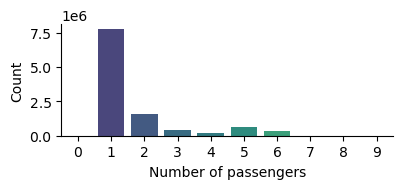

In [20]:
p2 = sns.catplot(x='passenger_count', kind='count', data=data_jan, palette='viridis', height=2, aspect=2)
p2.set_axis_labels("Number of passengers", "Count")
p2.set_titles("Distribution of Vendor ID")

#### Observations:

- In data set there is trips with 0 passengers
- There is passengers count with more than 6 passengers
#### Action:

- Mean value of the passenger count feature is 1.66 so replacing 0 passengers data wiht min 1 passenger
- We are going to remove outliers for passenger count by considering trips only less than or equal to 6 passengers


In [21]:
#replacing 0 passenger count with 1
data_jan['passenger_count'] = np.where(data_jan['passenger_count'] == 0, 1, data_jan['passenger_count'])

In [22]:
#Considering only passenger count less than or equal to 6
data_jan = data_jan[data_jan['passenger_count'] <= 6]

### Trip Distance
***
Lets now have a look on the defferent types of trips and distences 

In [23]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
data_jan['trip_distance'].describe()

count   10904994.000
mean           7.238
std         4729.862
min            0.000
25%            1.610
50%            2.700
75%            4.960
max     12874736.090
Name: trip_distance, dtype: float64

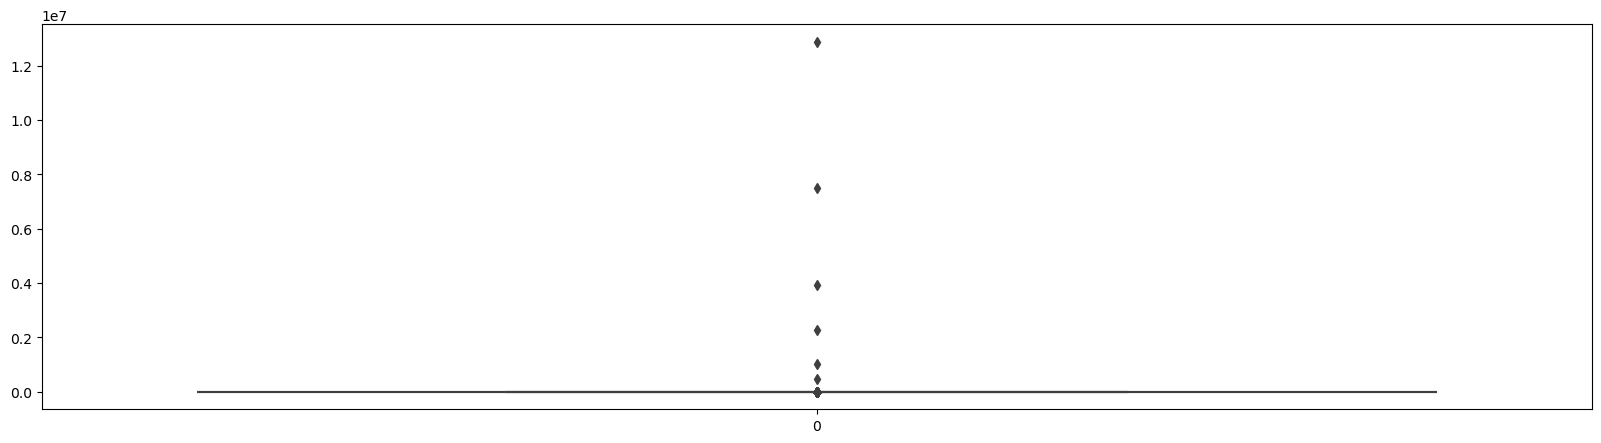

In [24]:
plt.figure(figsize = (20,5)) 
sns.boxplot(data_jan.trip_distance)
plt.gca().xaxis.set_major_formatter(ScalarFormatter(useMathText=True, useOffset=False))
plt.show()

/var/folders/j3/hpl51kl96xgg0w6dc46nyy640000gn/T/ipykernel_7700/387381113.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_data=data_jan.trip_distance.groupby(pd.cut(data_jan.trip_distance,bins)).count()


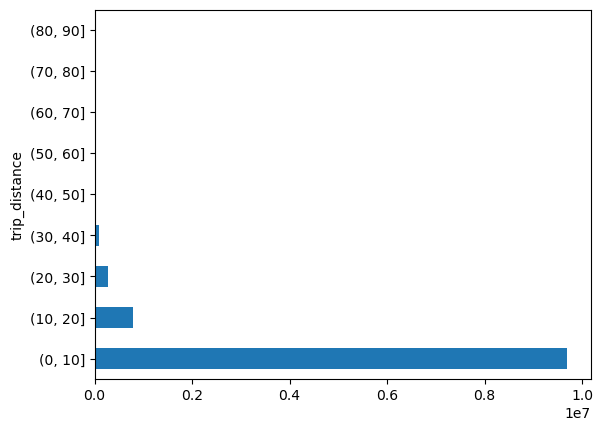

In [25]:
bins= np.arange(0,100,10)
group_data=data_jan.trip_distance.groupby(pd.cut(data_jan.trip_distance,bins)).count()
ax = group_data.plot(kind='barh')
plt.show()


#### Observations:

- We observed outliers in the distance when we analysed by box plot
- Most of the tips are having 0 to 10km
- There is trips with 0 distance and that cant be taken as a data it will be occured dueto some technical issues or passenger trip canceled
#### Action:

- Have to be taken care of these inconsistencies in zero distance in some way after bivarent analysis.
- Removing outliers using winsorization persentail

In [26]:
#outlier detectin using winsorization persentail
u_limit = data_jan['trip_distance'].quantile(0.999)

l_limit = data_jan['trip_distance'].quantile(0.001)
print(u_limit,l_limit)

40.07 0.0


In [27]:
#only considering trip_distance between 1% and 99% of the trip_distance
data_jan[data_jan["trip_distance"]>u_limit]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,pickup_hour,weekday,month,pickup_day_name,trip_duration_sec,avg_speed_kph
5107,2,2016-01-01 00:48:02,2016-01-01 01:33:13,6,46.330,4,N,181,265,1,...,19.760,0.000,0.300,118.560,0,4,1,Friday,2711.000,61.520
5805,1,2016-01-01 00:24:37,2016-01-01 01:06:19,1,40.390,1,N,161,23,1,...,5.000,11.080,0.300,85.380,0,4,1,Friday,2502.000,58.120
11024,1,2016-01-01 00:41:53,2016-01-01 01:50:34,1,64.860,4,N,263,265,2,...,0.000,0.000,0.300,185.800,0,4,1,Friday,4121.000,56.660
11942,2,2016-01-01 00:28:48,2016-01-01 01:18:33,2,41.750,1,N,50,92,2,...,0.000,5.540,0.300,78.340,0,4,1,Friday,2985.000,50.350
14824,2,2016-01-01 00:47:50,2016-01-01 01:48:25,1,75.820,5,N,186,265,1,...,0.000,0.000,0.300,163.300,0,4,1,Friday,3635.000,75.090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10898823,2,2016-01-31 23:54:32,2016-02-01 00:34:58,1,45.750,2,N,132,13,2,...,0.000,5.540,0.300,58.340,23,6,1,Sunday,2426.000,67.890
10899074,1,2016-01-31 23:20:10,2016-02-01 00:14:38,1,57.780,1,N,74,265,2,...,0.000,5.540,0.300,104.840,23,6,1,Sunday,3268.000,63.650
10899171,1,2016-01-31 23:48:16,2016-02-01 00:32:15,2,42.810,1,N,132,175,2,...,0.000,0.000,0.300,72.800,23,6,1,Sunday,2639.000,58.400
10900538,2,2016-01-31 23:24:00,2016-02-01 00:14:32,1,45.540,1,N,163,201,2,...,0.000,2.080,0.300,79.880,23,6,1,Sunday,3032.000,54.070


### RateCode Id
***
We have 6 defferent rate code ids for the trips 

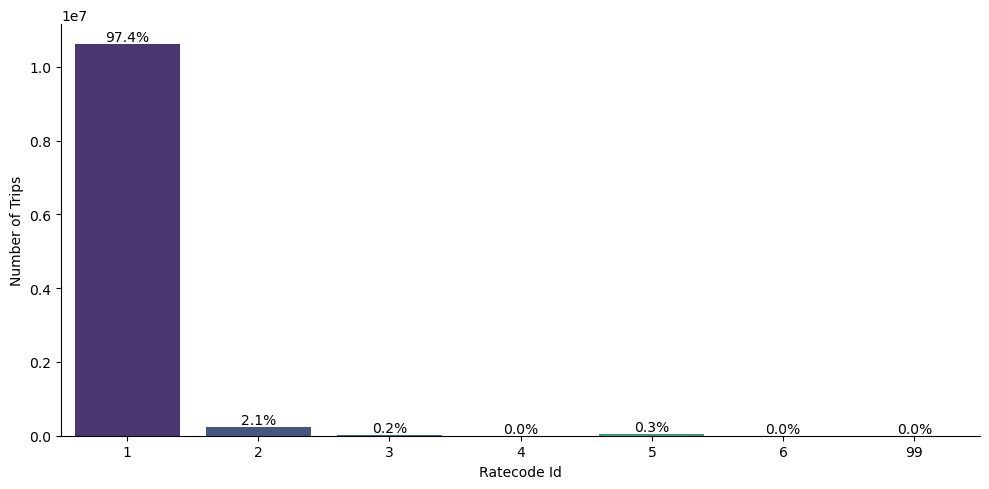

In [28]:
prate = sns.catplot(x='RatecodeID', kind='count', data=data_jan, palette='viridis', height=5, aspect=2)
prate.set_axis_labels("Ratecode Id", "Number of Trips")
prate.set_titles("Distribution of Ratecode Count")

# Adding percentage annotations on top of the bars
total = float(len(data_jan))  # Total number of trips in the data
for ax in prate.axes.flat:
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.show()


In [29]:
data_jan.RatecodeID.unique()

array([ 1,  3,  2,  5,  4,  6, 99])

In [30]:
data_jan[data_jan.RatecodeID==99].count().sum()

4737

#### Observations:

- In ratecode it can only have values 1 to 6 here we have value 99 with 15237 records
- Majority of the trips are calculated as standard rate
#### Action:

- so we can change this 99 to ratecode 1 that is standard rate

In [31]:
#replacing 99 with unknown ratecode 1
data_jan['RatecodeID'].replace(99, 1, inplace=True)

/var/folders/j3/hpl51kl96xgg0w6dc46nyy640000gn/T/ipykernel_7700/1076536103.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_jan['RatecodeID'].replace(99, 1, inplace=True)


### Store and forward flag
***
In this feature, ride data is stored in the cab memmory before forwarding it the vendor if there is any network isues these rides are having flag value 1, if it is not a stored ride then flag value is 0.

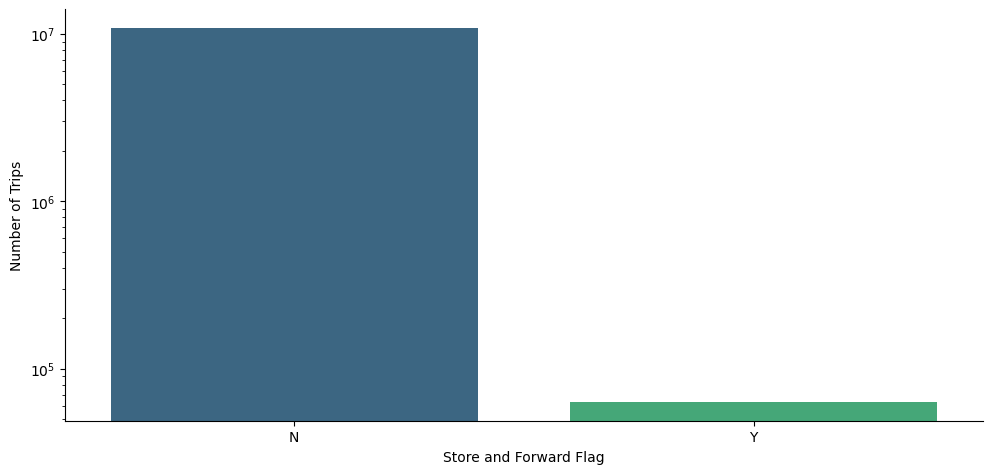

In [32]:
# Visualization 3: Bar plot for store_and_fwd_flag
p3 = sns.catplot(x='store_and_fwd_flag', kind='count', data=data_jan, palette='viridis', height=5, aspect=2)
p3.set(yscale='log')
p3.set_axis_labels("Store and Forward Flag", "Number of Trips")
p3.set_titles("Distribution of Store and Forward Flag")

In [33]:
#counting the value y in vendor
data_jan.VendorID[data_jan.store_and_fwd_flag == 'N'].value_counts()

VendorID
2    5834210
1    5007600
Name: count, dtype: int64

In [34]:
data_jan.VendorID[data_jan.store_and_fwd_flag == 'Y'].value_counts()

VendorID
1    63184
Name: count, dtype: int64

#### Observations:

- There is only a 63184 records with store and forward it shows most of the rides are not a stored one
- These 63184 stored rides are occured with vendor 1, there is no stored rides for vendor 2
- It will be some times vendor 2 is using advaced technologies than vendor 1


### Payment Type
***
Here this feature tells about how the passenger paid for the trip,1= Credit card 2= Cash 3= No charge 4= Dispute 5= Unknown 6= Voided trip

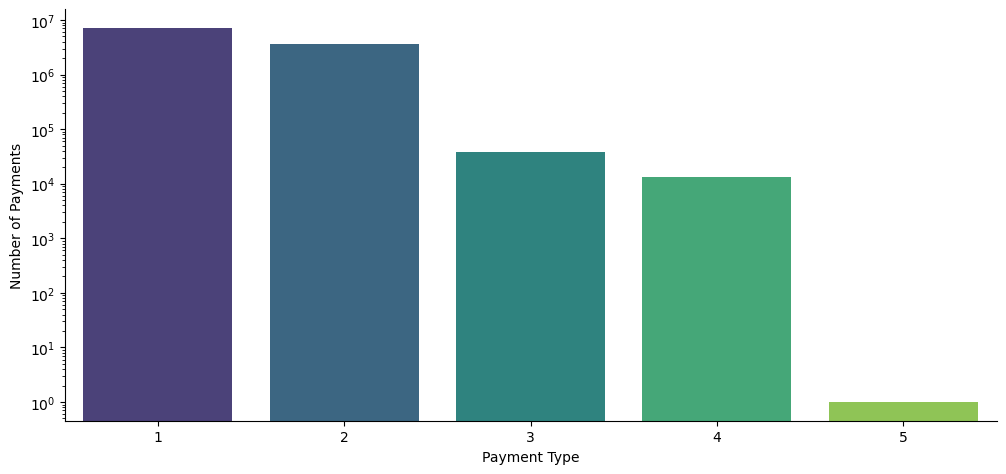

In [35]:
p_pay = sns.catplot(x='payment_type', kind='count', data=data_jan, palette='viridis', height=5, aspect=2)
p_pay.set(yscale='log')
p_pay.set_axis_labels("Payment Type", "Number of Payments")
p_pay.set_titles("Distribution of Payment Type Count")

plt.show()

#### Observations:

- Most of the rides payed by credit card and cash


### Total Amount
***
This feature is the sum of all the charges fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge

In [36]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
data_jan.total_amount.describe()

count   10904994.000
mean          15.642
std           36.379
min         -958.400
25%            8.300
50%           11.620
75%           17.160
max       111271.650
Name: total_amount, dtype: float64

In [37]:
data_jan = data_jan.drop(columns=['fare_amount','extra','mta_tax','tip_amount','tolls_amount','improvement_surcharge'])
data_jan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10904994 entries, 0 to 10905066
Data columns (total 17 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        int64         
 4   trip_distance          float64       
 5   RatecodeID             int64         
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  total_amount           float64       
 11  pickup_hour            int32         
 12  weekday                int32         
 13  month                  int32         
 14  pickup_day_name        object        
 15  trip_duration_sec      float64       
 16  avg_speed_kph          float64       
dtypes: datetime64[ns](2), float64(4), int32(3), int64(6), object(2)
memo

In [38]:
data_jan[data_jan["total_amount"]<0]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,total_amount,pickup_hour,weekday,month,pickup_day_name,trip_duration_sec,avg_speed_kph
953,2,2016-01-01 00:20:55,2016-01-01 00:24:47,1,0.980,1,N,232,232,4,-6.300,0,4,1,Friday,232.000,15.210
2826,2,2016-01-01 00:42:25,2016-01-01 00:42:47,1,0.060,1,N,90,90,4,-3.800,0,4,1,Friday,22.000,9.820
3400,2,2016-01-01 00:08:24,2016-01-01 00:18:34,1,0.160,5,N,246,246,4,-200.300,0,4,1,Friday,610.000,0.940
3460,2,2016-01-01 00:39:41,2016-01-01 00:40:09,2,0.030,1,N,68,68,3,-3.800,0,4,1,Friday,28.000,3.860
3712,2,2016-01-01 00:37:55,2016-01-01 00:39:54,2,0.430,1,N,142,142,3,-4.800,0,4,1,Friday,119.000,13.010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10892347,2,2016-01-31 22:22:52,2016-01-31 22:24:51,1,0.710,1,N,50,50,3,-4.800,22,6,1,Sunday,119.000,21.480
10895375,2,2016-01-31 22:51:17,2016-01-31 22:51:40,5,0.020,1,N,100,100,4,-3.800,22,6,1,Sunday,23.000,3.130
10896335,2,2016-01-31 23:37:49,2016-01-31 23:40:40,2,1.010,1,N,140,263,4,-5.800,23,6,1,Sunday,171.000,21.260
10900961,2,2016-01-31 23:32:32,2016-01-31 23:33:17,2,0.020,1,N,230,230,3,-3.800,23,6,1,Sunday,45.000,1.600


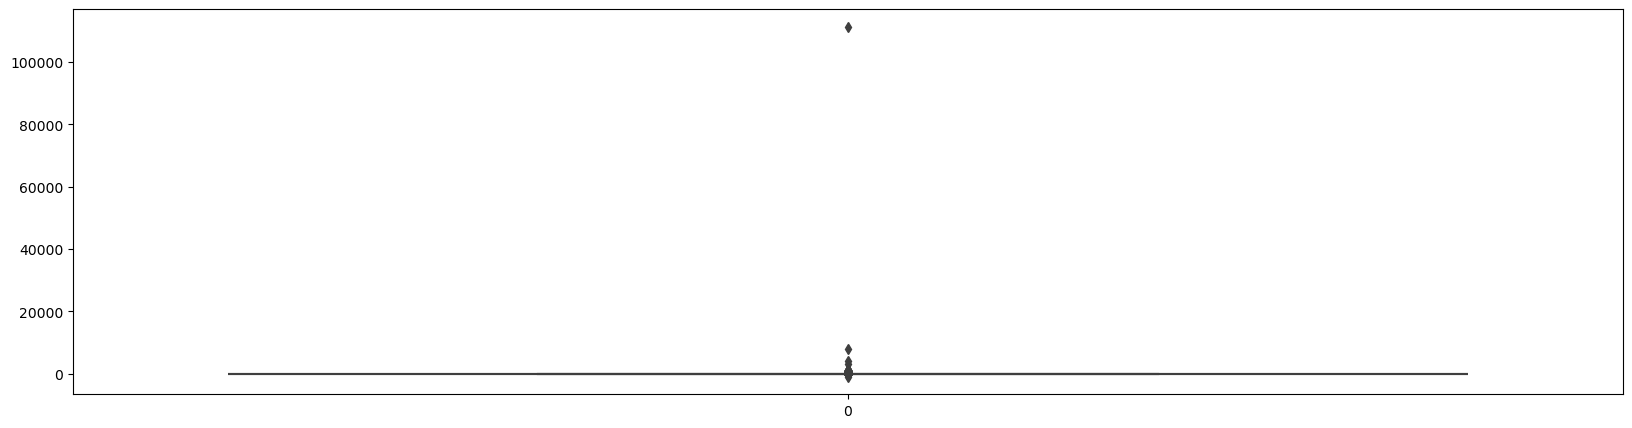

In [39]:
plt.figure(figsize = (20,5)) 
sns.boxplot(data_jan.total_amount)
plt.gca().xaxis.set_major_formatter(ScalarFormatter(useMathText=True, useOffset=False))
plt.show()

#### Observations:

- There is data with 0 total amount and some of huge amonunt in total amount
- There is total charge with negative values 
#### Action:
- Total amount cant be negative so taking absolute values 
- Outliers can be removed by using winsorization persentail

In [40]:
#taking absolut for negative total amount
data_jan['total_amount'] = data_jan['total_amount'].abs()

In [41]:
#outlier detection using winsorization persentail
u_limit = data_jan['total_amount'].quantile(0.999)

l_limit = data_jan['total_amount'].quantile(0.001)
print(u_limit,l_limit)

106.56 3.3


In [42]:
#trimming outliers
data_jan = data_jan[(data_jan["total_amount"] < u_limit) & (data_jan["total_amount"] > l_limit)]

### Trip duration
***
Finding invalid values and outliers for trip duration

In [43]:
data_jan.trip_duration_sec.describe()

count   10872503.000
mean         915.818
std         5218.419
min        -2637.000
25%          381.000
50%          629.000
75%         1013.000
max      7194762.000
Name: trip_duration_sec, dtype: float64

#### Observations:

- Trip duratin having negative values in it, it will be sometimes the swaping of data in pickup and drop off times
- There is duration which is so higher and cant seen as a real data
#### Actions
- Taking absolut of the duration
- Outliers can be removed by using winsorization persentail

In [44]:
# taking absolute of the duration
data_jan['trip_duration_sec'] = data_jan['trip_duration_sec'].abs().round(2)

In [45]:
#outlier detection using winsorization persentail
u_limit = data_jan['trip_duration_sec'].quantile(0.999)

l_limit = data_jan['trip_duration_sec'].quantile(0.001)
print(u_limit,l_limit) 

85444.49800000153 2.0


In [46]:
#here we can see rides with only 2 secound - it will be some times after the trip started passenger cancelled
#trimming outliers
data_jan = data_jan[(data_jan["trip_duration_sec"] < u_limit) & (data_jan["trip_duration_sec"] > l_limit)]

### Speed km/h
***
Finding invalid values and outliers for Trip average speed

In [47]:
data_jan.avg_speed_kph.describe()

count    10848981.000
mean           83.083
std        190115.142
min             0.000
25%            12.780
50%            17.100
75%            23.200
max     625372911.690
Name: avg_speed_kph, dtype: float64

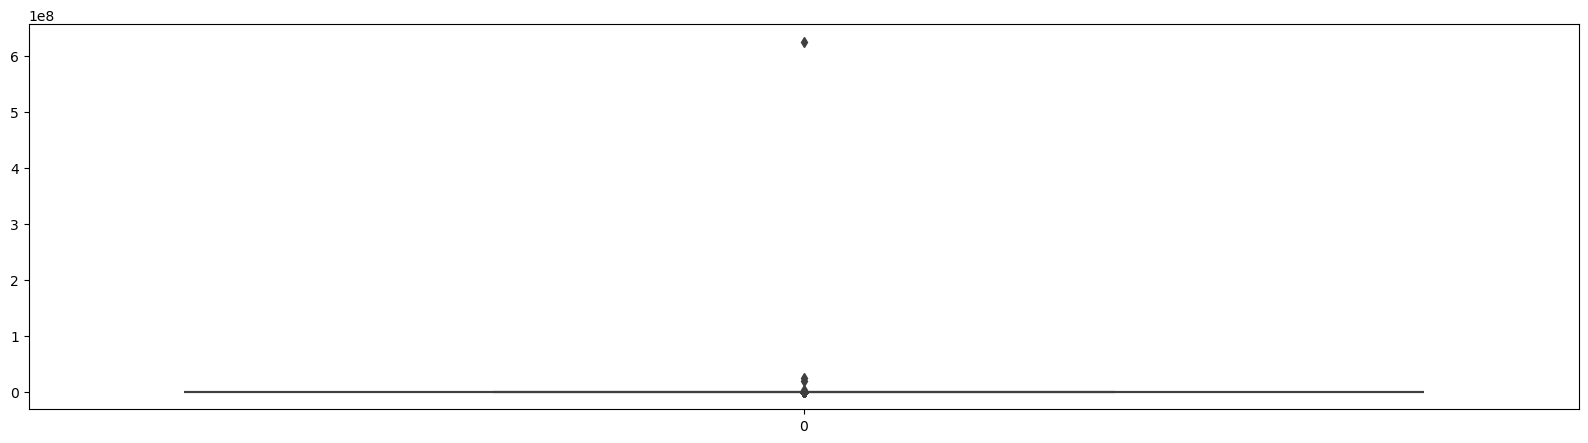

In [48]:
plt.figure(figsize = (20,5))
sns.boxplot(data_jan.avg_speed_kph)
plt.show()

#### Observations:

- Mean for average speed is 83.083 km/h 
- There is trips wiht 0 average speed and a max 625372911.690 km/h this max values are unrealestic
#### Actions
- We considering only the rides which is less than 104 km/h according to the nyc traffic rule.

In [49]:
# removing speed which is having more than 104 km/h
data_jan=data_jan[data_jan["avg_speed_kph"] <= 104]

### Trip per Hour
***


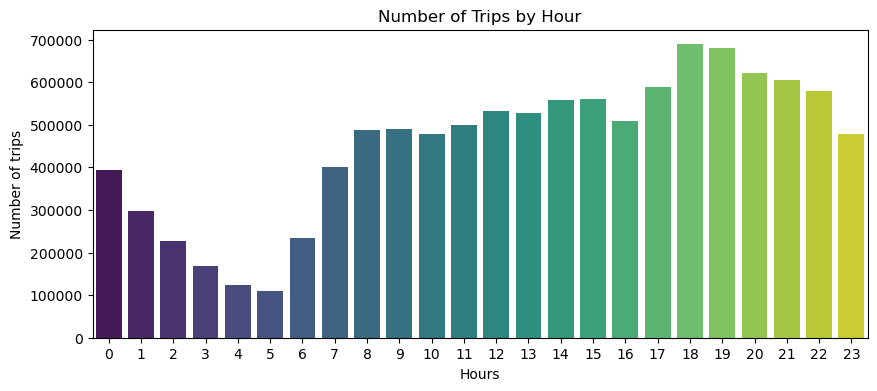

In [50]:
plt.figure(figsize=(10, 4))

sns.countplot(x='pickup_hour', data=data_jan, palette='viridis')
plt.ylabel('Number of trips')
plt.xlabel('Hours')
plt.title('Number of Trips by Hour')
plt.show()

#### Observations:

- At midnight lesser number of rides and it gradually increasing from 6 am it will be due to office hours
- And we can see that after 8 pm number of rides gradually decreasing

### Trip per Weekday
***


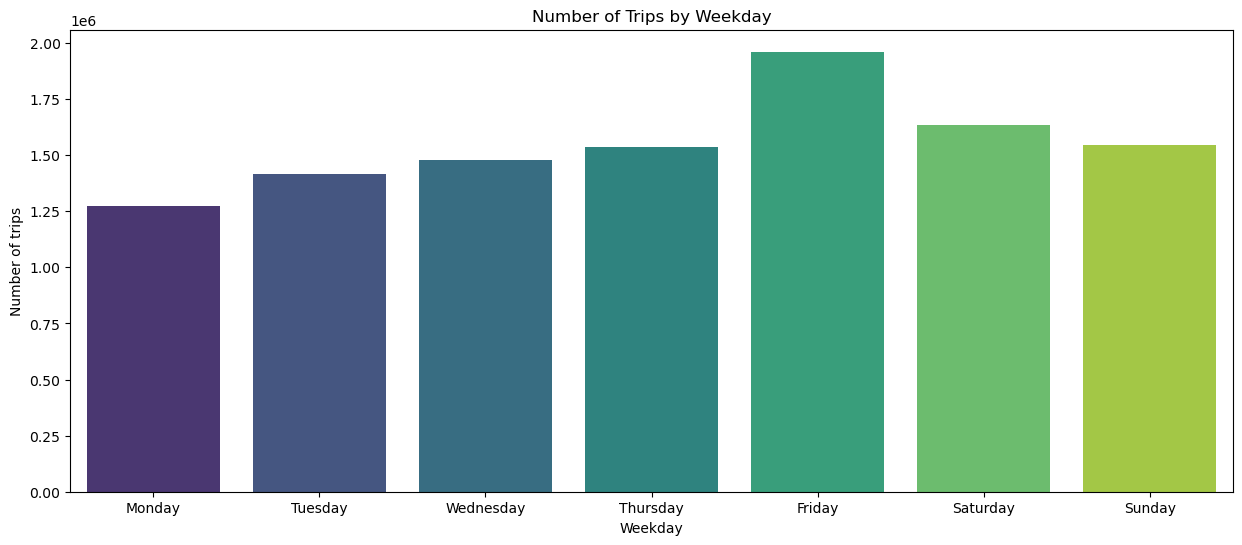

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

#define weekday names
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(15, 6))

sns.countplot(x='weekday', data=data_jan, palette='viridis', order=range(7))
plt.xticks(range(7), day_names) 

plt.ylabel('Number of trips')
plt.xlabel('Weekday')
plt.title('Number of Trips by Weekday')

plt.show()

#### Observations:

- weekends having more number of rides than other days

# Bivarate analysis
- Trip duration per weekday, month
- Distance per hour, weekday, month
- Trip Distance vs Trip duration

### Trip duration per Hour
***

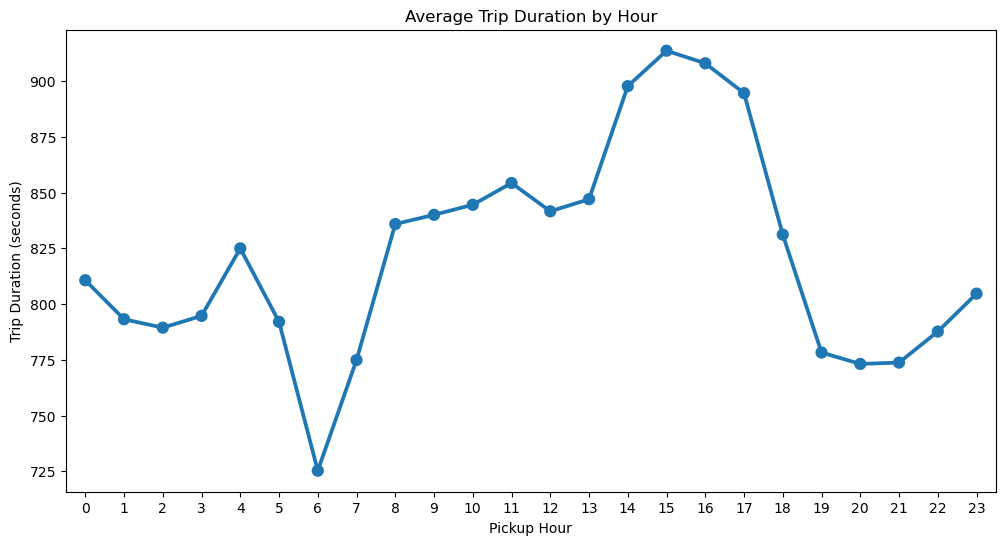

In [55]:
# Taking mean  of duratin for each hour
group2 = data_jan.groupby('pickup_hour')['trip_duration_sec'].mean().reset_index()


# figure size
plt.figure(figsize=(12, 6))

# Creating points and defining x and y axis
sns.pointplot(x='pickup_hour', y='trip_duration_sec', data=group2, markers='o', linestyles='-', capsize=0.2)

# Set labels and title for the graph
plt.ylabel('Trip Duration (seconds)')
plt.xlabel('Pickup Hour')
plt.title('Average Trip Duration by Hour')


plt.show()

### Trip duration per weekday
***

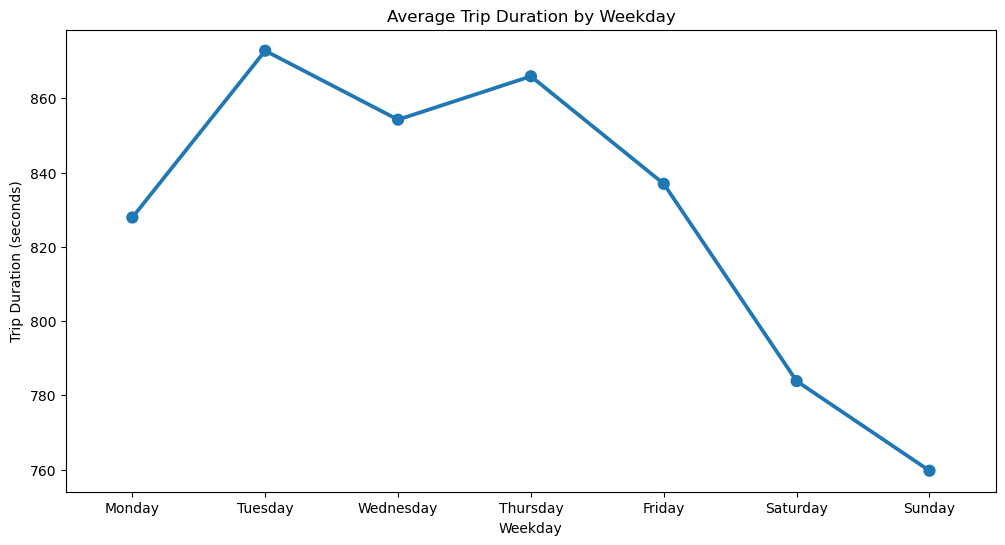

In [53]:
# Taking mean  of duratin for each weekday
group2 = data_jan.groupby('weekday')['trip_duration_sec'].mean().reset_index()


# figure size
plt.figure(figsize=(12, 6))

# Creating points and defining x and y axis
sns.pointplot(x='weekday', y='trip_duration_sec', data=group2, markers='o', linestyles='-', capsize=0.2)

# Set labels and title for the graph
plt.ylabel('Trip Duration (seconds)')
plt.xlabel('Weekday')
plt.title('Average Trip Duration by Weekday')

# giving names for x axis
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.xticks(range(7), day_names)

plt.show()

#### Observations:

- We can see that on Tuesday having longest trip duration among all days


### Trip duration vs Trip Distance
***

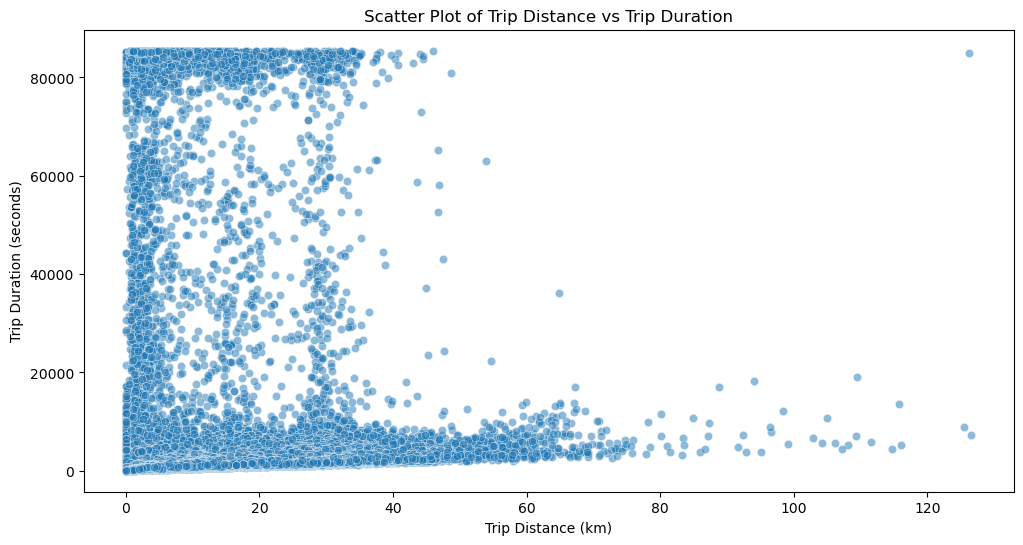

In [54]:
plt.figure(figsize=(12, 6))

# Creating a scatter plot distance vs duration
sns.scatterplot(x='trip_distance', y='trip_duration_sec', data=data_jan, alpha=0.5)

# Set labels and title for the graph
plt.xlabel('Trip Distance (km)')
plt.ylabel('Trip Duration (seconds)')
plt.title('Scatter Plot of Trip Distance vs Trip Duration')

plt.show()

#### Observation:

-Here there is rides with 0 distance and rides which have zero duration

#### Action:

- Here we are going to filtering out the data with distance 0 and duration less than a minute for better
- Checking for trips which is covered less than 1 km distance and but clocked more than an hour and going to remove thos

# Feature selection 

### Handling categorical features by dummy encoding
***
- VendorID,passenger_count,RatecodeID,store_and_fwd_flag,payment_type,pickup_hour,weekday,month,pickup_day_name

In [ ]:
dummy_vendor = pd.get_dummies(data_jan.VendorID, prefix='VendorID')
dummy_vendor.drop(dummy_vendor.columns[0], axis=1, inplace=True) # droping first column after dummy creation for avoiding dummy trap and keeping others

#converitng boolian to integer type
dummy_vendor = dummy_vendor.astype(int)
data_jan = pd.concat([data_jan,dummy_vendor], axis = 1)

dummy_passenger = pd.get_dummies(data_jan.passenger_count, prefix='passenger_count')
dummy_passenger.drop(dummy_passenger.columns[0], axis=1, inplace=True) # droping first column after dummy creation for avoiding dummy trap and keeping others
#converitng boolian to integer type
dummy_passenger = dummy_passenger.astype(int)
data_jan = pd.concat([data_jan,dummy_passenger], axis = 1)

dummy_ratecode = pd.get_dummies(data_jan.RatecodeID, prefix='RatecodeID')
dummy_ratecode.drop(dummy_ratecode.columns[0], axis=1, inplace=True) # droping first column after dummy creation for avoiding dummy trap and keeping others
#converitng boolian to integer type
dummy_ratecode = dummy_ratecode.astype(int)
data_jan = pd.concat([data_jan,dummy_ratecode], axis = 1)


dummy_flag = pd.get_dummies(data_jan.store_and_fwd_flag, prefix='flag')
dummy_flag.drop(dummy_flag.columns[0], axis=1, inplace=True) # droping first column after dummy creation for avoiding dummy trap and keeping others
#converitng boolian to integer type
dummy_flag = dummy_flag.astype(int)
data_jan = pd.concat([data_jan,dummy_flag], axis = 1)

dummy_payment_type = pd.get_dummies(data_jan.payment_type, prefix='payment_type')
dummy_payment_type.drop(dummy_payment_type.columns[0], axis=1, inplace=True) # droping first column after dummy creation for avoiding dummy trap and keeping others
#converitng boolian to integer type
dummy_payment_type = dummy_payment_type.astype(int)
data_jan = pd.concat([data_jan,dummy_payment_type], axis = 1)


dummy_hour = pd.get_dummies(data_jan.pickup_hour, prefix='pickup_hour')
dummy_hour.drop(dummy_hour.columns[0], axis=1, inplace=True)# droping first column after dummy creation for avoiding dummy trap and keeping others
#converitng boolian to integer type
dummy_hour = dummy_hour.astype(int)
data_jan = pd.concat([data_jan,dummy_hour], axis = 1)


dummy_weekday = pd.get_dummies(data_jan.weekday, prefix='weekday')
dummy_weekday.drop(dummy_weekday.columns[0], axis=1, inplace=True) # droping first column after dummy creation for avoiding dummy trap and keeping others
#converitng boolian to integer type
dummy_weekday = dummy_weekday.astype(int)
data_jan = pd.concat([data_jan,dummy_weekday], axis = 1)

dummy_month = pd.get_dummies(data_jan.month, prefix='month')
dummy_month.drop(dummy_month.columns[0], axis=1, inplace=True) # droping first column after dummy creation for avoiding dummy trap and keeping others
#converitng boolian to integer type
dummy_month = dummy_month.astype(int)
data_jan = pd.concat([data_jan,dummy_month], axis = 1)


In [ ]:
#checking index of features and its labels
list(zip( range(0,len(data_jan.columns)),data_jan.columns))

### Train Test split
***

In [ ]:
# Feature variables X
X = data_jan.iloc[:, [10] + list(range(15, 62))].values

# Target variable Y
Y = data_jan['trip_duration_sec'].values


In [ ]:
#split data as test and train
X_train, X_test, y_train, y_test = train_test_split(X,Y, random_state=4, test_size=0.2)

### Heatmap


In [ ]:
plt.figure(figsize=(15,15))

corr = pd.DataFrame(X_train).corr()
#creating correlation metrix
corr.index = pd.DataFrame(X_train).columns
#heatmap creating 
sns.heatmap(corr, cmap='RdYlGn', vmin=-1, vmax=1, square=True)

plt.title("Correlation Heatmap", fontsize=16)
plt.show()


# Model

### Multiple Linear Regression
***
- It is used to explain the relationship between one continuous dependent and two or more dependent variable

#### Train

In [62]:
linear_regressor = LinearRegression() 
linear_regressor.fit(X_train,y_train)

LinearRegression()

#### Predict

In [63]:
y_pred_linear = linear_regressor.predict(X_test) 

#### Evaluate

In [71]:
print('RMSE score : {}'.format(np.sqrt(metrics.mean_squared_error(y_test,y_pred_linear))))
print('Variance score : %.2f' % linear_regressor.score(X_test, y_test))

RMSE score : 2.2566883485488252e-09
Variance score : 1.00


#### Observation for Multiple Linear Regression

- Perfect varience score
  
- Verry poor RMS value
  
- Not a good model for this data

### Random Forest Regression
***
-random forest fits a number of classifying decision trees on various sub samples of the dataset and use averaging to improve the predictive accuracy and control over-fitting

#### Train

In [67]:
#default setting for RandomForestRegressor
random_regressor= RandomForestRegressor(n_jobs=-1) #object created
random_regressor.fit(X_train,y_train) #fitting the model

RandomForestRegressor(n_jobs=-1)

#### Predict

In [68]:
y_pred_random = random_regressor.predict(X_test)

#### Evaluate

In [97]:
print('RMSE score  : {}'.format(np.sqrt(metrics.mean_squared_error(y_test,y_pred_random))))
print('RMSLE score  : {}'.format(np.sqrt(metrics.mean_squared_log_error(y_test,y_pred_random))))
print('R-squared score  : {:.2f}'.format(r2_score(y_test, y_pred_random)))


RMSE score  : 0.5696920184233061
RMSLE score  : 1.8890331498637335e-05
R-squared score  : 1.00


#### Observation

- Lower RMS score value indicates better performance

- Close to zero is desirable for RMSLE

- Perfect R-squared score that is 1

- **Best Perfoming Model**

### XGBoost Regressor
***
- Extreme Gradient Boosting, it converts weeklearnig features into strong learners

#### Train

In [88]:
regressor_xgb = XGBRegressor(n_jobs=-1)#object creating with default value
regressor_xgb.fit(X_train,y_train)#fiting the data

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=-1,
             num_parallel_tree=None, random_state=None, ...)

#### Predict

In [89]:
y_pred_xgb = regressor_xgb.predict(X_test)#predicting y value

#### Evaluate

In [91]:
print('RMSE score : {}'.format(np.sqrt(metrics.mean_squared_error(y_test,y_pred_xgb))))
print('Variance score  : %.2f' % regressor_xgb.score(X_test, y_test))

RMSE score : 702.6411441898865
Variance score  : 0.85


#### Observation

- Variance is near 1 that is acceptable
- But high RMSE score shows poor performance
- Better than linear model


# comparison of model

In [96]:
#Comparing test results for the XGBoost and random forest
print("Total sum of difference between actual and predicted by Random forest regressor is : %d"%np.abs(np.sum(np.subtract(y_test,y_pred_random))))
print("Total sum of difference between actual and predicted by XGB regressor is : %d"%np.abs(np.sum(np.subtract(y_test,y_pred_xgb))))

Total sum of difference between actual and predicted by Random forest regressor is : 266
Total sum of difference between actual and predicted by XGB regressor is : 1626298


# Result 

- Based on the camparison Random forest have lesser defference between test and predicted
- **Random forest shows better performace than other models**